<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Experimenting_with_various_models_stock_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grabbing Stock Data

In [1]:
!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.49
    Uninstalling yfinance-0.2.49:
      Successfully uninstalled yfinance-0.2.49


In [2]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 4*360)
start, end

(datetime.datetime(2020, 12, 17, 19, 44, 31, 188329),
 datetime.datetime(2024, 11, 26, 19, 44, 31, 188329))

In [4]:
#Choose stock tickers to study
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA', 'AI', 'SMCI', 'ADI', 'NOW', 'DDOG', 'CROX', 'TWLO', 'ETSY', 'DXCM', 'ZBRA', 'ANET']
stocks = [i for i in stockList]
stocks

['NVDA',
 'MSFT',
 'AAPL',
 'TSLA',
 'AI',
 'SMCI',
 'ADI',
 'NOW',
 'DDOG',
 'CROX',
 'TWLO',
 'ETSY',
 'DXCM',
 'ZBRA',
 'ANET']

In [5]:
df = yf.download(stocks, start, end)

[*********************100%***********************]  15 of 15 completed


In [6]:
df.tail()

Price        Adj Close                                                 \
Ticker            AAPL         ADI         AI        ANET        CROX   
Date                                                                    
2024-11-20  229.000000  211.009995  32.360001  381.709991   98.589996   
2024-11-21  228.520004  213.960007  34.990002  404.970001  101.809998   
2024-11-22  229.869995  214.589996  37.419998  406.480011  106.080002   
2024-11-25  232.869995  223.580002  37.860001  399.720001  108.529999   
2024-11-26  234.889999  217.070007  36.380001  408.170013  104.820000   

Price                                                                  ...  \
Ticker            DDOG       DXCM       ETSY        MSFT          NOW  ...   
Date                                                                   ...   
2024-11-20  135.449997  75.239998  50.860001  414.659973  1022.979980  ...   
2024-11-21  143.860001  74.459999  51.990002  412.869995  1047.050049  ...   
2024-11-22  154.830002  72.830002  52.299999  417.000000  1060.599976  ...   
2024-11-25  156.630005  77.830002  55.680000  418.790009  1052.709961  ...   
2024-11-26  154.610001  77.519997  54.709999  427.105011  1065.609985  ...   

Price         Volume                                                  \
Ticker          DDOG     DXCM     ETSY      MSFT      NOW       NVDA   
Date                                                                   
2024-11-20   6353300  3077200  2234000  19191700  1141900  309871700   
2024-11-21   8671800  3230900  2337700  20780200  1111300  400946600   
2024-11-22  13878800  4562600  2379700  24814600  1436900  236406200   
2024-11-25   7686200  6579300  7691600  27691100  1930200  344941900   
2024-11-26   2679308  2403279  1060760  13048771   414104  143505670   

Price                                             
Ticker           SMCI      TSLA     TWLO    ZBRA  
Date                                              
2024-11-20  105366500  66340700  2763000  489400  
2024-11-21  118032600  58011700  4216400  368400  
2024-11-22  159607100  89140700  2504200  232000  
2024-11-25  170113700  95890900  5962900  420200  
2024-11-26   78369990  48847164   968002  166164  

[5 rows x 90 columns]

In [7]:
print(df.info)

<bound method DataFrame.info of Price        Adj Close                                                  \
Ticker            AAPL         ADI          AI        ANET        CROX   
Date                                                                     
2020-12-18  123.855110  135.225586  137.589996   71.930000   64.379997   
2020-12-21  125.390335  133.382797  160.889999   71.815002   65.620003   
2020-12-22  128.959534  134.963684  177.470001   72.705002   64.760002   
2020-12-23  128.059891  133.972107  161.059998   71.622498   64.589996   
2020-12-24  129.047531  135.141434  161.000000   72.209999   62.689999   
...                ...         ...         ...         ...         ...   
2024-11-20  229.000000  211.009995   32.360001  381.709991   98.589996   
2024-11-21  228.520004  213.960007   34.990002  404.970001  101.809998   
2024-11-22  229.869995  214.589996   37.419998  406.480011  106.080002   
2024-11-25  232.869995  223.580002   37.860001  399.720001  108.529999   
2024-1

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
#Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

In [10]:
print(df.head)

<bound method NDFrame.head of Price        Adj Close                                                  \
Ticker            AAPL         ADI          AI        ANET        CROX   
Date                                                                     
2020-12-18  123.855110  135.225586  137.589996   71.930000   64.379997   
2020-12-21  125.390335  133.382797  160.889999   71.815002   65.620003   
2020-12-22  128.959534  134.963684  177.470001   72.705002   64.760002   
2020-12-23  128.059891  133.972107  161.059998   71.622498   64.589996   
2020-12-24  129.047531  135.141434  161.000000   72.209999   62.689999   
...                ...         ...         ...         ...         ...   
2024-11-20  229.000000  211.009995   32.360001  381.709991   98.589996   
2024-11-21  228.520004  213.960007   34.990002  404.970001  101.809998   
2024-11-22  229.869995  214.589996   37.419998  406.480011  106.080002   
2024-11-25  232.869995  223.580002   37.860001  399.720001  108.529999   
2024-11-

# Preprocess

In [11]:
#featues and target
n_future = 5 #this variable will be used when I need to predict 5 days into the future
n_steps = 30 # last 30 days will be used as the input

In [12]:
#prepare the sequences for training
def create_multiticker_sequences(data, n_steps, n_future):
  X,y = [], []
  for i in range(len(data) - n_steps - n_future):
    X.append(data[i: i + n_steps])
    y.append(data[i + n_steps + n_future - 1]) # predict n_future days ahead
  return np.array(X), np.array(y)

In [13]:
#create sequences
X,y = create_multiticker_sequences(scaled_df.values, n_steps, n_future)

In [14]:
#Train test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM

In [15]:
def build_lstm_model(input_shape):
  model = Sequential([
      LSTM(100, return_sequences=True, input_shape=input_shape),
      Dropout(0.2),
      LSTM(100),
      Dropout(0.2),
      Dense(input_shape[1]) #predict all tickers at once
  ])
  model.compile(optimizer = 'adam', loss = 'mse')
  return model

In [16]:
#train the model
input_shape = (n_steps, scaled_df.shape[1])
lstm_model = build_lstm_model(input_shape)
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.6210 - val_loss: 1.1593
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3100 - val_loss: 0.9082
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.2418 - val_loss: 0.8479
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.2027 - val_loss: 0.7757
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2006 - val_loss: 0.7832
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1944 - val_loss: 0.8101
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1858 - val_loss: 0.8105
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.1728 - val_loss: 0.8310
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.1742 - val_loss: 0.8567
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1592 - val_loss: 0.8485


In [17]:
lstm_predictions = lstm_model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [18]:
#regression analytics
mse = mean_squared_error(y_test, lstm_predictions)
mae = mean_absolute_error(y_test, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lstm_predictions)

In [19]:
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MSE: 0.848455846074063
MAE: 0.6704361453206764
RMSE: 0.9211166300062458
R2: -2.6538196654277995


In [20]:
#calculate profit or loss on predicted movement
actual_returns = y_test[1:] - y_test[:-1]
predicted_returns = lstm_predictions[1:] - lstm_predictions[:-1]


In [21]:
strategy_returns = np.sign(predicted_returns) * actual_returns
pnl = np.sum(strategy_returns) #profit and loss
print(pnl)

-7.579885018547291


In [22]:
mean_return = np.mean(strategy_returns)
std_return = np.std(strategy_returns)
sharpe_ratio = mean_return / std_return
print(sharpe_ratio)

-0.000993050025163125


In [23]:
#Hit ratio is the proportion of the model correctly predicting the direction of the stock movement
hits = np.sign(predicted_returns) == np.sign(actual_returns)
hit_ratio = np.sum(hits) / len(hits)
print(f"LSTM Hit Ratio: {hit_ratio:.4f}")

LSTM Hit Ratio: 44.9895


#New Strategy LSTM

This strategy is an idea I have come up with myself where the input is data from large market-cap stocks like NVDA, MSFT, TSLA, AMZN, Meta, and X, and the target will be the price of the s and p 500

In [1]:
# import numpy as np
# import pandas as pd
# import yfinance as yf
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Define stock tickers and S&P 500 index
# stocks = ['AMZN', 'MSFT', 'NVDA', 'TSLA', 'META', 'AAPL']  # Replace 'AAPL' with your 6th stock
# index = '^GSPC'  # S&P 500

# # Fetch data using yfinance
# start_date = '2015-01-01'
# end_date = '2023-01-01'

# def fetch_data(tickers, start, end):
#     data = yf.download(tickers, start=start, end=end)['Adj Close']
#     return data

# # Fetch stock data
# stock_data = fetch_data(stocks + [index], start_date, end_date)

# # Fill missing data
# stock_data.fillna(method='ffill', inplace=True)
# stock_data.fillna(method='bfill', inplace=True)

# # Separate features and target
# X = stock_data[stocks].values
# y = stock_data[index].values

# # Normalize the data
# scaler_X = MinMaxScaler(feature_range=(0, 1))
# X_scaled = scaler_X.fit_transform(X)

# scaler_y = MinMaxScaler(feature_range=(0, 1))
# y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# # Convert data into sequences for LSTM
# def create_sequences(X, y, sequence_length):
#     X_seq, y_seq = [], []
#     for i in range(len(X) - sequence_length):
#         X_seq.append(X[i:i + sequence_length])
#         y_seq.append(y[i + sequence_length])
#     return np.array(X_seq), np.array(y_seq)

# sequence_length = 30  # Number of days to use for prediction
# X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

# # Sequential train-test split
# train_size = int(0.8 * len(X_seq))  # 80% for training
# X_train, X_test = X_seq[:train_size], X_seq[train_size:]
# y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# # Build the LSTM model
# model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(sequence_length, len(stocks))),
#     Dropout(0.2),
#     LSTM(50, return_sequences=False),
#     Dropout(0.2),
#     Dense(25, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model
# train_loss = model.evaluate(X_train, y_train, verbose=0)
# test_loss = model.evaluate(X_test, y_test, verbose=0)
# print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# # Make predictions
# y_pred_scaled = model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_test_unscaled = scaler_y.inverse_transform(y_test)

# # Plot the predictions
# plt.figure(figsize=(12, 6))
# plt.plot(y_test_unscaled, label='True S&P 500 Price')
# plt.plot(y_pred, label='Predicted S&P 500 Price')
# plt.legend()
# plt.title('True vs Predicted S&P 500 Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.show()


In [2]:
# # Compute regression metrics
# mae = mean_absolute_error(y_test_unscaled, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred))
# mape = np.mean(np.abs((y_test_unscaled - y_pred) / y_test_unscaled)) * 100
# r2 = r2_score(y_test_unscaled, y_pred)

# print(f"MAE: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAPE: {mape:.2f}%")
# print(f"R-Squared: {r2:.2f}")

# # Compute directional accuracy
# direction_actual = np.sign(np.diff(y_test_unscaled.flatten()))
# direction_predicted = np.sign(np.diff(y_pred.flatten()))
# directional_accuracy = np.mean(direction_actual == direction_predicted)

# print(f"Directional Accuracy: {directional_accuracy:.2f}")

[*********************100%***********************]  7 of 7 completed
<ipython-input-3-490a2eb1f706>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method = 'ffill', inplace = True)
<ipython-input-3-490a2eb1f706>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method = 'bfill', inplace = True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0067 - val_loss: 0.0138
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0088
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.3132e-04 - val_loss: 0.0052
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0974e-04 - val_loss: 0.0091
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.9547e-04 - val_loss: 0.0069
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5824e-04 - val_loss: 0.0098
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.7734e-04 - val_loss: 0.0070
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0972e-04 - val_loss: 0.0095
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7755e-04 - val_loss: 0.0114
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9849e-04 - val_loss: 0.0129
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s

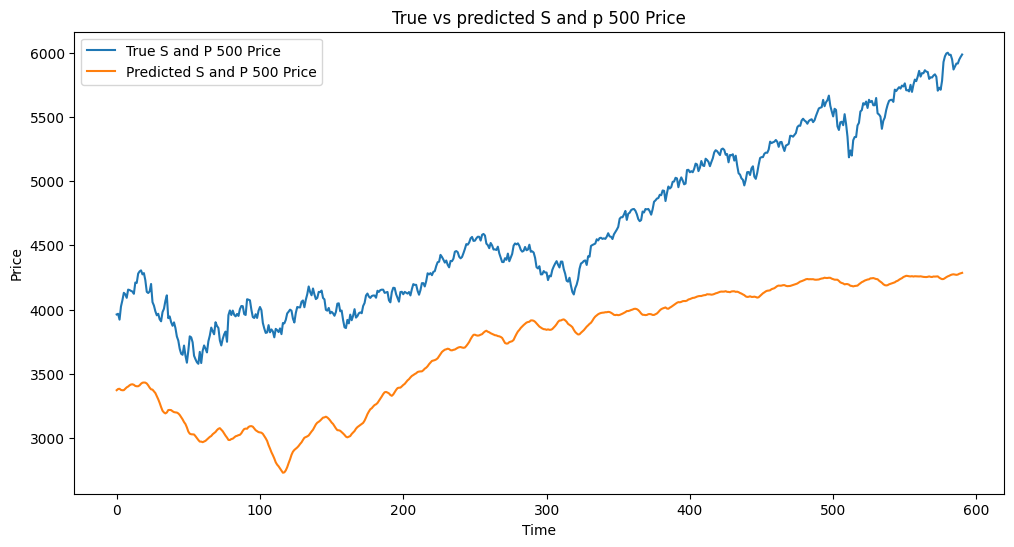

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.losses import Huber
from tensorflow.keras.layers import Input

# Define stock tickers and S and p 500 index
stocks = ['AMZN', 'MSFT', 'NVDA', 'TSLA', 'META', 'AAPL']
index = '^GSPC' # s and p 500 ticker

# Fetch data
start_date = '2013-01-01'
end_date = '2024-11-26'

def fetch_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)['Adj Close']
    return data
stock_data = fetch_data(stocks + [index], start_date, end_date)

#clean data
stock_data.fillna(method = 'ffill', inplace = True)
stock_data.fillna(method = 'bfill', inplace = True)

#technical indicators
def add_indicators(df):
  for col in df.columns:
    df[f'{col}_MA10'] = df[col].rolling(window=10).mean()
    df[f'{col}_MA50'] = df[col].rolling(window=50).mean()
    df[f'{col}_RSI'] = (df[col].diff().apply(lambda x: max(x,0)).rolling(window=14).mean() /
                        df[col].diff().abs().rolling(window=14).mean()) *  100
  return df.fillna(0)
stock_data = add_indicators(stock_data)

#separate features and target
X = stock_data.drop(columns=index).values
y = stock_data[index].values

#Normalize the data
scaler_X = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

#convert data into a time sequence for the LSTM
def create_sequences(X, y, sequence_length):
  X_seq, y_seq = [], []
  for i in range(len(X) - sequence_length):
    X_seq.append(X[i:i + sequence_length])
    y_seq.append(y[i + sequence_length])
  return np.array(X_seq), np.array(y_seq)

sequence_length = 45  # Number of days to use for prediction
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

# Sequential train-test split
train_size = int(0.8 * len(X_seq))  # 80% for training
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

#Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(sequence_length, X.shape[1])),
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.3),
    Dense(50, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer = 'adam', loss= Huber())

# Train the model on the data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data= (X_test, y_test))

# Evaluate model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

#predictions on the data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test)

#plot predictions using matplotlib
plt.figure(figsize=(12,6))
plt.plot(y_test_unscaled, label='True S and P 500 Price')
plt.plot(y_pred, label='Predicted S and P 500 Price')
plt.legend()
plt.title('True vs predicted S and p 500 Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [4]:
#evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test_unscaled, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred))
mape = np.mean(np.abs((y_test_unscaled - y_pred) / y_test_unscaled)) * 100
correlation = np.corrcoef(y_test_unscaled.flatten(), y_pred.flatten())[0, 1]

# Directional accuracy
direction_actual = np.sign(np.diff(y_test_unscaled.flatten()))
direction_predicted = np.sign(np.diff(y_pred.flatten()))
directional_accuracy = np.mean(direction_actual == direction_predicted)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"Directional Accuracy: {directional_accuracy:.2f}")

Mean Absolute Error (MAE): 922.0184
Root Mean Squared Error (RMSE): 971.4350
Mean Absolute Percentage Error (MAPE): 19.65%
Correlation Coefficient: 0.9034
Directional Accuracy: 0.53


In [5]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 33s]
val_loss: 0.0013911712740082294

Best val_loss So Far: 0.0008352984441444278
Total elapsed time: 00h 05m 27s
Best Hyperparameters:
units_1: 200
dropout_1: 0.4
units_2: 200
dropout_2: 0.2
dense_units: 50
Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0082 - val_loss: 0.0062
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.9725e-04 - val_loss: 0.0024
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.5987e-04 - val_loss: 0.0069
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.3124e-04 - val_loss: 0.0025
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9134e-04 - val_loss: 8.3372e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0198e-04 - val_loss: 0.0014
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3678e-04 - val_loss: 0.0021
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7159e-04 - val_loss: 0.0019
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.

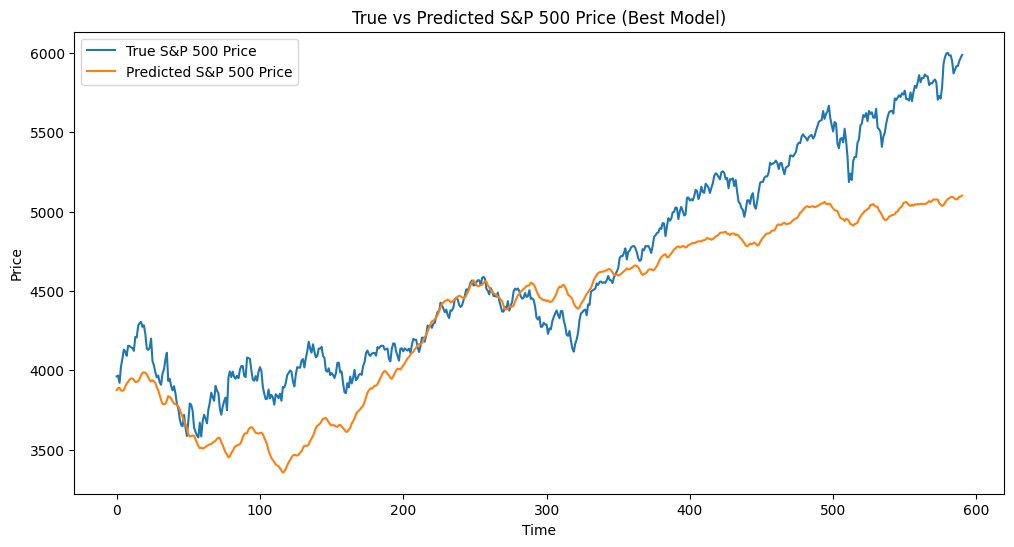

In [6]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.losses import Huber

# Define the search space
def build_model(hp):
    model = Sequential([
        Input(shape=(sequence_length, X.shape[1])),
        LSTM(
            hp.Int('units_1', min_value=50, max_value=200, step=50),
            return_sequences=True
        ),
        Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        LSTM(
            hp.Int('units_2', min_value=50, max_value=200, step=50),
            return_sequences=False
        ),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(hp.Int('dense_units', min_value=25, max_value=100, step=25), activation='relu'),
        Dense(1)
    ])
    model.compile(
        optimizer='adam',
        loss=Huber(delta=1.0)
    )
    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of hyperparameter configurations to try
    executions_per_trial=2,  # Run each configuration multiple times
    directory='tuner_logs',
    project_name='lstm_tuning'
)

# Run hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    batch_size=32
)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=32
)

# Evaluate the best model
final_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Loss: {final_loss:.4f}")

# Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test)

# Plot true vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='True S&P 500 Price')
plt.plot(y_pred, label='Predicted S&P 500 Price')
plt.legend()
plt.title('True vs Predicted S&P 500 Price (Best Model)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [7]:
# Calculate metrics
mae = mean_absolute_error(y_test_unscaled, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred))
mape = np.mean(np.abs((y_test_unscaled - y_pred) / y_test_unscaled)) * 100
correlation = np.corrcoef(y_test_unscaled.flatten(), y_pred.flatten())[0, 1]

# Directional accuracy
direction_actual = np.sign(np.diff(y_test_unscaled.flatten()))
direction_predicted = np.sign(np.diff(y_pred.flatten()))
directional_accuracy = np.mean(direction_actual == direction_predicted)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"Directional Accuracy: {directional_accuracy:.2f}")

Mean Absolute Error (MAE): 292.4813
Root Mean Squared Error (RMSE): 366.8504
Mean Absolute Percentage Error (MAPE): 6.08%
Correlation Coefficient: 0.9222
Directional Accuracy: 0.52


Initial Capital: $100000
Final Portfolio Value: $117239.96
Total Profit/Loss: $17239.96
Cumulative Return: 17.24%
Sharpe Ratio: 1.16


<ipython-input-10-bf04f56142c4>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_value = float(cash + (positions * y_test_unscaled[i]))


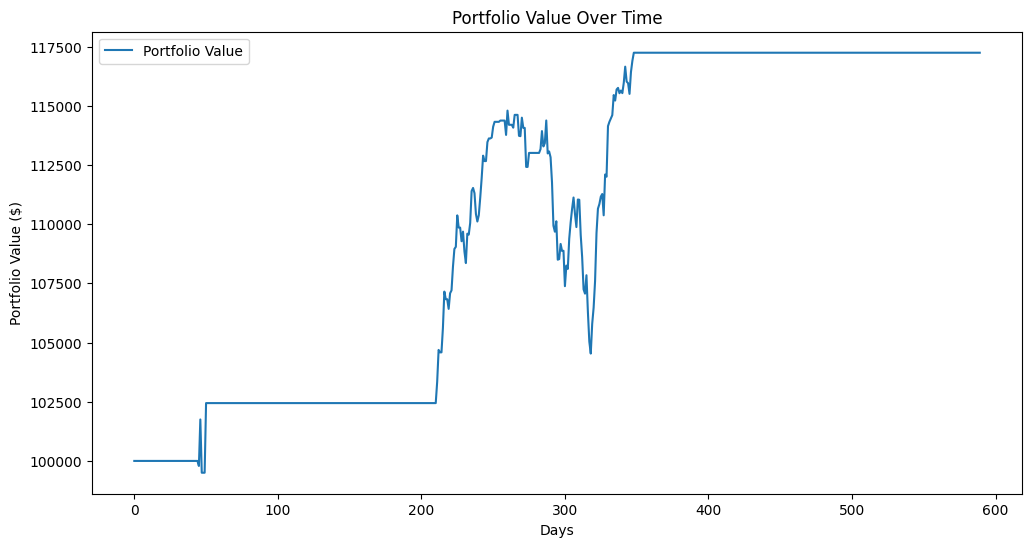

In [10]:
# Parameters
initial_capital = 100000  # Starting capital in dollars
transaction_cost = 0.001  # Transaction cost as a percentage (0.1%)
capital = initial_capital
cash = initial_capital
positions = 0  # Number of units held
portfolio_value = []
daily_pnl = []

# Simulate trading
for i in range(1, len(y_test_unscaled)):
    # Decision: buy, sell, or hold
    if y_pred[i] > y_test_unscaled[i - 1] and positions == 0:  # Buy signal
        positions = cash / y_test_unscaled[i]  # Buy maximum units possible
        cash = 0
    elif y_pred[i] < y_test_unscaled[i - 1] and positions > 0:  # Sell signal
        cash = positions * y_test_unscaled[i]  # Sell all units
        cash -= transaction_cost * cash  # Deduct transaction cost
        positions = 0

    # Calculate portfolio value
    current_value = float(cash + (positions * y_test_unscaled[i]))
    portfolio_value.append(current_value)

    # Calculate daily P&L
    if i > 1:
        daily_pnl.append(float(portfolio_value[-1] - portfolio_value[-2]))

# Ensure portfolio value has no missing values
portfolio_value = [initial_capital] + portfolio_value  # Add initial capital for the first value

# Convert to DataFrame for analysis
import pandas as pd

pnl_df = pd.DataFrame({
    'Portfolio Value': portfolio_value[1:],  # Ignore the initial value used as reference
    'Daily P&L': [0] + daily_pnl
})

# Summary metrics
total_pnl = portfolio_value[-1] - initial_capital
cumulative_return = (portfolio_value[-1] / initial_capital - 1) * 100
daily_returns = pd.Series(pnl_df['Daily P&L']) / initial_capital

# Ensure no division by zero in Sharpe ratio calculation
if daily_returns.std() != 0:
    sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)
else:
    sharpe_ratio = 0  # No variability in returns, Sharpe ratio is undefined

# Print results
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${portfolio_value[-1]:.2f}")
print(f"Total Profit/Loss: ${total_pnl:.2f}")
print(f"Cumulative Return: {cumulative_return:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(portfolio_value[1:], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()